# Preprocessing

In [1]:
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
from scipy.misc import logsumexp
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix
from scipy.misc import logsumexp
%matplotlib inline

In [2]:
# This line loads the text for you. Don't change it! 
text_data = np.load("text.npy", allow_pickle=False)
with open('words.txt', 'r') as f:
    word_dict_lines = f.readlines()
    
# Preprocessing
text_data = text_data.astype('int')
doc_id = text_data[:,0]
word_id = text_data[:,1]
count = text_data[:,2]

D = max(doc_id)+1
V = max(word_id)+1

W = coo_matrix((count,(doc_id, word_id)), shape=(D, V)).tocsr()

# LDA Class Function

In [3]:
# CS 181, Spring 2016
# Homework 5: EM
# Name: Luke Mueller
# Email: lam908@mail.harvard.edu

class LDA(object):

    # Initializes with the number of topics
    def __init__(self, num_topics):
        self.num_topics = num_topics
        
        Beta = np.empty((num_topics,V))
        for k in range(num_topics):
            Beta[k] = np.random.dirichlet(np.ones(V))
        
        Theta = np.random.dirichlet(np.ones(num_topics))
        
        self.Beta = Beta
        self.Theta = Theta
        
    # This should run the M step of the EM algorithm
    def M_step(self):
        Gamma = self.Gamma
        # update theta_hat mat
        self.Theta = (np.sum(Gamma, axis=0)/D).T

        # update beta_hat mat
        N_d = W.sum(axis=1)
        numerator = W.transpose().dot(Gamma)
        denominator = np.dot(N_d.T, Gamma)
        self.Beta = (numerator/denominator).T
        
    # This should run the E step of the EM algorithm
    def E_step(self):
        Theta = self.Theta
        Beta = self.Beta
        
        # update gamma mat
        log_numerator = np.log(Theta.T) + W.dot(np.log(Beta.T))
        log_denominator = logsumexp(log_numerator, axis=1).reshape((-1,1))
        Gamma = np.exp(np.subtract(log_numerator, log_denominator))
        
        prod = np.multiply(Gamma, log_numerator)
        prod[np.isnan(prod)] = 0
        loglik = -logsumexp(prod)
        
        self.Gamma = Gamma
        
        return loglik
        
    def EM(self, iters):
        objective = np.empty(iters)
        for i in range(iters):
            obj = self.E_step()
            objective[i] = obj
            self.M_step()
        return objective   
    
    # This should print the topics that you find
    def print_topics(self, num_words):
        Beta = self.Beta
        top_indices = np.argsort(Beta, axis=1)[:,Beta.shape[1]-num_words::]
        for k in range(self.num_topics):
            words = []
            for w in range(num_words):
                word_index = top_indices[k,w]
                words.append(word_dict_lines[word_index])
            print "topic", k, words

# Results

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log
/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: invalid value encountered in multiply


topic 0 ['11294 genealogical\n', '21750 proteomics\n', '3725 cellular\n', '21749 proteins\n', '3722 celle\n']
topic 1 ['25801 specifiable\n', '6270 database\n', '26460 studying\n', '21615 projected\n', '23314 researched\n']
topic 2 ['29138 universityoftennessee\n', '21583 programing\n', '21615 projected\n', '3984 chemists\n', '23314 researched\n']
topic 3 ['20416 phased\n', '21615 projected\n', '16448 materiel\n', '12380 higham\n', '23314 researched\n']
topic 4 ['21583 programing\n', '23314 researched\n', '21615 projected\n', '24417 sciences\n', '26455 studi\n']
topic 5 ['16905 metis\n', '21615 projected\n', '21502 problemsolving\n', '27260 systemwide\n', '23314 researched\n']
topic 6 ['21615 projected\n', '11389 geons\n', '26460 studying\n', '23314 researched\n', '27749 thep\n']
topic 7 ['27749 thep\n', '21691 property\n', '27260 systemwide\n', '26460 studying\n', '23314 researched\n']
topic 8 ['21785 provided\n', '21615 projected\n', '26460 studying\n', '6270 database\n', '23314 rese

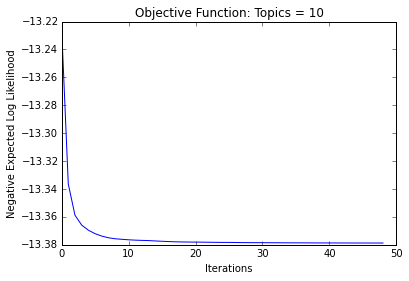

In [5]:
# Feel free to add more functions as needed for the LDA class. You are welcome to change anything below this line. 
# However, your code should be contained in the constructor for the LDA class, and should be executed in a way 
# similar to the below.
R = 50
num_topics = 10
LDAClassifier = LDA(num_topics=num_topics)
loglik = LDAClassifier.EM(R)
LDAClassifier.print_topics(5)

plt.plot(range(R-1),loglik[1:,])
plt.xlabel("Iterations")
plt.ylabel("Negative Expected Log Likelihood")
plt.title("Objective Function: Topics = %d" %num_topics)
plt.show()

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log
/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: invalid value encountered in multiply


topic 0 ['11294 genealogical\n', '21750 proteomics\n', '3725 cellular\n', '3722 celle\n', '21749 proteins\n']
topic 1 ['13527 informational\n', '26460 studying\n', '6270 database\n', '21615 projected\n', '23314 researched\n']
topic 2 ['17327 modelbased\n', '21615 projected\n', '26460 studying\n', '23314 researched\n', '6270 database\n']
topic 3 ['27248 systematic\n', '11294 genealogical\n', '21749 proteins\n', '3722 celle\n', '3725 cellular\n']
topic 4 ['21785 provided\n', '26460 studying\n', '21615 projected\n', '6270 database\n', '23314 researched\n']
topic 5 ['21583 programing\n', '21615 projected\n', '23314 researched\n', '26455 studi\n', '24417 sciences\n']
topic 6 ['26460 studying\n', '21502 problemsolving\n', '21615 projected\n', '27260 systemwide\n', '23314 researched\n']
topic 7 ['21615 projected\n', '26460 studying\n', '21502 problemsolving\n', '23314 researched\n', '27749 thep\n']
topic 8 ['2571 biomass\n', '21583 programing\n', '29138 universityoftennessee\n', '26455 studi\

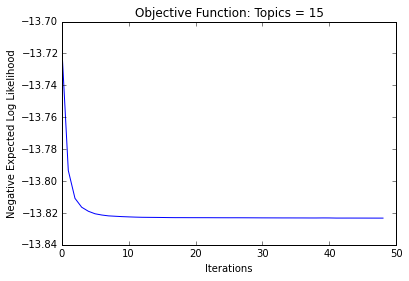

In [4]:
# Feel free to add more functions as needed for the LDA class. You are welcome to change anything below this line. 
# However, your code should be contained in the constructor for the LDA class, and should be executed in a way 
# similar to the below.
R = 50
num_topics = 15
LDAClassifier = LDA(num_topics=num_topics)
loglik = LDAClassifier.EM(R)
LDAClassifier.print_topics(5)

plt.plot(range(R-1),loglik[1:,])
plt.xlabel("Iterations")
plt.ylabel("Negative Expected Log Likelihood")
plt.title("Objective Function: Topics = %d" %num_topics)
plt.show()

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log
/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: invalid value encountered in multiply


topic 0 ['26460 studying\n', '27260 systemwide\n', '21691 property\n', '16143 magnetically\n', '23314 researched\n']
topic 1 ['21615 projected\n', '3984 chemists\n', '26455 studi\n', '29138 universityoftennessee\n', '23314 researched\n']
topic 2 ['21785 provided\n', '21615 projected\n', '26460 studying\n', '23314 researched\n', '6270 database\n']
topic 3 ['21615 projected\n', '21691 property\n', '16448 materiel\n', '3984 chemists\n', '23314 researched\n']
topic 4 ['29138 universityoftennessee\n', '21583 programing\n', '5099 conferences\n', '26455 studi\n', '23314 researched\n']
topic 5 ['16905 metis\n', '747 algorithmus\n', '27260 systemwide\n', '21502 problemsolving\n', '23314 researched\n']
topic 6 ['27248 systematic\n', '21615 projected\n', '6924 designate\n', '6270 database\n', '23314 researched\n']
topic 7 ['11389 geons\n', '21502 problemsolving\n', '26460 studying\n', '23314 researched\n', '27749 thep\n']
topic 8 ['6270 database\n', '26460 studying\n', '26978 supportable\n', '216

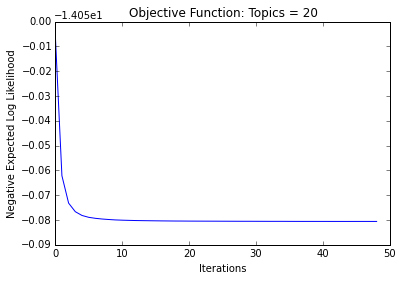

In [6]:
# Feel free to add more functions as needed for the LDA class. You are welcome to change anything below this line. 
# However, your code should be contained in the constructor for the LDA class, and should be executed in a way 
# similar to the below.
R = 50
num_topics = 20
LDAClassifier = LDA(num_topics=num_topics)
loglik = LDAClassifier.EM(R)
LDAClassifier.print_topics(5)

plt.plot(range(R-1),loglik[1:,])
plt.xlabel("Iterations")
plt.ylabel("Negative Expected Log Likelihood")
plt.title("Objective Function: Topics = %d" %num_topics)
plt.show()

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log
/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: invalid value encountered in multiply


topic 0 ['13527 informational\n', '4607 colleges\n', '5203 connectionism\n', '23314 researched\n', '18264 networkbased\n']
topic 1 ['14333 isotopy\n', '21615 projected\n', '6270 database\n', '26460 studying\n', '16305 mantra\n']
topic 2 ['26460 studying\n', '17327 modelbased\n', '21615 projected\n', '6270 database\n', '23314 researched\n']
topic 3 ['7027 developmental\n', '2928 brains\n', '27248 systematic\n', '3722 celle\n', '3725 cellular\n']
topic 4 ['17350 modeltheoretic\n', '26460 studying\n', '21615 projected\n', '23314 researched\n', '6270 database\n']
topic 5 ['726 algebraical\n', '11389 geons\n', '26460 studying\n', '23314 researched\n', '27749 thep\n']
topic 6 ['21615 projected\n', '30471 workshops\n', '29138 universityoftennessee\n', '5099 conferences\n', '23314 researched\n']
topic 7 ['16905 metis\n', '21502 problemsolving\n', '27749 thep\n', '27260 systemwide\n', '23314 researched\n']
topic 8 ['11294 genealogical\n', '23314 researched\n', '21749 proteins\n', '25801 specifi

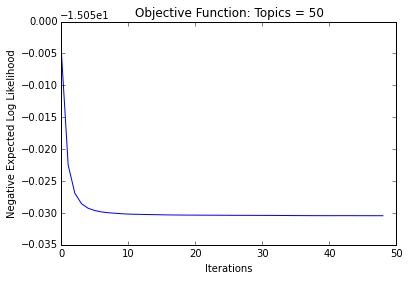

In [7]:
# Feel free to add more functions as needed for the LDA class. You are welcome to change anything below this line. 
# However, your code should be contained in the constructor for the LDA class, and should be executed in a way 
# similar to the below.
R = 50
num_topics = 50
LDAClassifier = LDA(num_topics=num_topics)
loglik = LDAClassifier.EM(R)
LDAClassifier.print_topics(5)

plt.plot(range(R-1),loglik[1:,])
plt.xlabel("Iterations")
plt.ylabel("Negative Expected Log Likelihood")
plt.title("Objective Function: Topics = %d" %num_topics)
plt.show()

/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:39: RuntimeWarning: divide by zero encountered in log
/Users/Luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:43: RuntimeWarning: invalid value encountered in multiply


topic 0 ['29138 universityoftennessee\n', '24417 sciences\n', '26455 studi\n', '21615 projected\n', '23314 researched\n']
topic 1 ['6270 database\n', '26458 studio\n', '21615 projected\n', '26460 studying\n', '23314 researched\n']


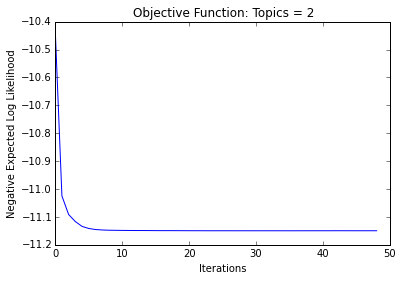

In [8]:
# Feel free to add more functions as needed for the LDA class. You are welcome to change anything below this line. 
# However, your code should be contained in the constructor for the LDA class, and should be executed in a way 
# similar to the below.
R = 50
num_topics = 2
LDAClassifier = LDA(num_topics=num_topics)
loglik = LDAClassifier.EM(R)
LDAClassifier.print_topics(5)

plt.plot(range(R-1),loglik[1:,])
plt.xlabel("Iterations")
plt.ylabel("Negative Expected Log Likelihood")
plt.title("Objective Function: Topics = %d" %num_topics)
plt.show()